<h3>Импорт библиотек</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<h3>Генерация сигналов</h3>

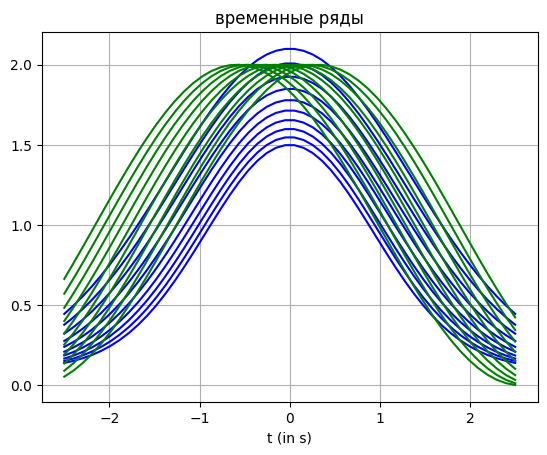

In [13]:
time_index = np.linspace(-5, 5, 50) * 0.5
tseries_list = {'Time': time_index}

for i in range(10):
    tseries_list["Tc"+str(i)] = np.exp(-time_index ** 2 / (2 * (28 / (21 + i)) ** 2)) * 1.5 * (28 / (21 + i)) + 0.1
for i in range(10):
    tseries_list["Ts"+str(i)] = np.sin(time_index + np.pi / 2 + (-np.pi + i) / 10) + 1

for i in range(10):
    plt.plot(time_index, tseries_list["Tc"+str(i)], '-b', label="Экспоненциальная")
for i in range(10):
    plt.plot(time_index, tseries_list["Ts"+str(i)], '-g', label="Синусоидная")
            
plt.title('временные ряды')
plt.xlabel('t (in s)')
plt.grid()

<h3>Ищем шейплейты</h3>

In [87]:
from scipy.spatial.distance import euclidean

def getCandidates(timeseries, min, max):
    candidates = []
    for l in range(min, max + 1):
        for i in range(len(timeseries) - l + 1):
            subsequence = timeseries[i:i + l]
            candidates.append(subsequence)
    return candidates

def addShapelet(result, shapelet):
    Answ = []
    i = 0
    for i in range(len(result)):
        if result[i][1] <= shapelet[1]:
            Answ += [result[i]]
        if result[i][1] > shapelet[1]:
            if i == 0 or result[i - 1][1] < shapelet[1]:
                Answ += [shapelet]
            else:
                Answ += [result[i - 1]]
    return Answ

def merge(k, Answ, shapelets):
    if len(Answ) == 0:
        return shapelets[0:k]
    result = Answ
    for shapelet in shapelets:
        if shapelet[1] < Answ[len(Answ) - 1][1]:
            Answ = addShapelet(result, shapelet)
    return result

In [88]:
def FindShapelet(tseries_list, k):
    Answ = []
    min = 3
    max = 3
    for timeseries in tseries_list:
        shapelets = []
        for l in range(min, max + 1):
            candidates = getCandidates(timeseries, min, max)
            for candidate in candidates:
                distances = [euclidean(candidate, candidate_dub) for candidate_dub in candidates]
                quality = np.mean(np.sqrt(distances))
                shapelets.append((candidate, quality))
        shapelets.sort(key=lambda x: x[1], reverse=True)
        Answ = merge(k, Answ, shapelets)
    return Answ

In [113]:
tseries_list_tc = []
tseries_list_ts = []

for i in range(10):
    tseries_list_tc.append(tseries_list["Tc"+str(i)])
    tseries_list_ts.append(tseries_list["Ts"+str(i)])

r = 20
shapletes1 = FindShapelet(tseries_list_tc, r)
shapletes2 = FindShapelet(tseries_list_ts, r)
print("Экспоненциальная функция. Шейплеты:")
print(shapletes1)
print()
print("Синусоидная функция. Шейплеты:")
print(shapletes2)

Экспоненциальная функция. Шейплеты:
[(array([0.44484325, 0.4968889 , 0.554122  ]), 1.1546450734964566), (array([0.554122  , 0.4968889 , 0.44484325]), 1.1546450734964566), (array([0.4968889 , 0.554122  , 0.61657395]), 1.113491810296926), (array([0.61657395, 0.554122  , 0.4968889 ]), 1.113491810296926), (array([0.68418287, 0.61657395, 0.554122  ]), 1.0753921486959166), (array([0.554122  , 0.61657395, 0.68418287]), 1.0753921486959164), (array([0.61657395, 0.68418287, 0.7567824 ]), 1.0403649615233652), (array([0.7567824 , 0.68418287, 0.61657395]), 1.0403649615233652), (array([0.68418287, 0.7567824 , 0.83409212]), 1.0084913554948587), (array([0.83409212, 0.7567824 , 0.68418287]), 1.0084913554948587), (array([2.08686522, 2.0985363 , 2.0985363 ]), 1.0067641817719357), (array([2.0985363 , 2.0985363 , 2.08686522]), 1.0067641817719357), (array([2.06372712, 2.08686522, 2.0985363 ]), 0.9985667666821675), (array([2.0985363 , 2.08686522, 2.06372712]), 0.9985667666821675), (array([2.08686522, 2.06372

<h3>Обучение классификатора</h3>

In [114]:
import random

x = []
y = []
shapletes = shapletes1 + shapletes2

for i in range(len(shapletes)):
    res = list(shapletes[i][0]) + [shapletes[i][1]]  
    x.append(res)
    if i < len(shapletes1): y.append(1)
    else: y.append(2)

x_train = []
x_test = []
y_train = []
y_test = []

indexes = np.arange(len(y))
random.shuffle(indexes)

for i in range(int(len(y) * 0.7)):
    x_train.append(x[indexes[i] - 1])
    y_train.append(y[indexes[i] - 1])
for i in range(int(len(y) * 0.7), len(y)):
    x_test.append(x[indexes[i] - 1])
    y_test.append(y[indexes[i] - 1])

print("Тренировочные данные:")
print(x_train)
print(y_train)
print()
print("Тестовые данные:")
print(x_test)
print(y_test)

Тренировочные данные:
[[0.6841828741596135, 0.7567824036228809, 0.8340921196182967, 1.0084913554948587], [0.19407249846155117, 0.2585694868163477, 0.33077979672059665, 1.2377980399344393], [0.9157103651581279, 0.8340921196182971, 0.7567824036228806, 0.9798937012172121], [0.6165739469744861, 0.5541220008312241, 0.49688889902376665, 1.113491810296926], [0.5858248279566785, 0.6806953917455816, 0.778887776085291, 1.0446072181214496], [1.9655782796811412, 1.98705175036189, 1.998256628907417, 1.0059330037214305], [2.098536302211623, 2.098536302211623, 2.0868652175260336, 1.0067641817719357], [0.6959681953842072, 0.6005078757174072, 0.509203591115625, 1.0782653597540313], [0.1379598129569567, 0.19407249846155117, 0.2585694868163477, 1.2743635091025982], [0.5541220008312241, 0.6165739469744863, 0.6841828741596135, 1.0753921486959164], [1.9340596117500568, 1.9655782796811412, 1.98705175036189, 0.9939473302022996], [1.9848452416851845, 2.0295242232390156, 2.063727121099023, 0.9698199983276976], 

In [116]:
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest()
clf.fit(x_train, y_train)

print("--- Классификатор TimeSeriesForest ---\n")
print(f"Accuracy = {clf.score(x_test, y_test)}")
for i in range(len(x_test)):
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(np.array(X_test[i]).reshape(1, -1))[0]}")
    print(f"Истинный класс для предсказаний {y_test[i]}\n")

--- Классификатор TimeSeriesForest ---

Accuracy = 0.9166666666666666
Вектор вероятности принадлежности к классам [0.038 0.962]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.81 0.19]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.186 0.814]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.942 0.058]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.608 0.392]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.486 0.514]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.804 0.196]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [0.144 0.856]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.6 0.4]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0.484 0.516]
Истинный класс для предсказаний 2

Вектор

<h3>Обучение классификатора датасетом показало неплохие результаты. Точность предсказаний при количестве шейплетов = 20 и длине всех шейплетов = 3 составила 0.92</h3>